# **1- Connexion et importation des modules**

In [491]:
# @title Conexion à google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [492]:
# @title Importation des différents modules
# Importation des différents modules

import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt

# Plotly
import plotly.express as px
from plotly import graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Plotly
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [493]:
# @title Chemins d'accés personalisés pour récupérer les 4 df suite à la standardisation dans le précédent notebook
# 0_Code_projet_global_2 Encodage des variables.ipynb

## Estelle ##
#df = pd.read_csv("/content/drive/MyDrive/Oct_cda_bankmarketing/Estelle/bank.csv")

## Laurent ##
#df = pd.read_csv("/content/drive/MyDrive/Oct_cda_bankmarketing/df_bank_clean.csv", sep=';')

## Guillaume ##
X_test = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Commun/3_bank_X_test.csv")
X_train = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Commun/3_bank_X_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Commun/3_bank_y_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Commun/3_bank_y_train.csv")
X_test_copie = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Commun/3_bank_X_test_copie.csv")


In [494]:
# @title Fonctions pour formater le texte lors des prints en gras ou souligné

def bold(text):
    return f"\033[1m{text}\033[0m"

def underline(text):
    return f"\033[4m{text}\033[0m"

# **2- Traitement des données**

In [495]:
# @title Affichage d'un des 4 df ci-dessus
y_test.head()

,Unnamed: 0,deposit
0,8,1
1,17,1
2,19,1
3,23,1
4,26,1


* Nous devons utiliser la colonne *Unnamed: 0* comme index et supprimer son nom.


In [496]:
# @title Utilisation de la colonne "Unnamed: 0" comme index puis en supprimant son nom
X_test.set_index("Unnamed: 0", inplace=True)
X_test = X_test.rename_axis(None)

X_train.set_index("Unnamed: 0", inplace=True)
X_train = X_train.rename_axis(None)

y_test.set_index("Unnamed: 0", inplace=True)
y_test = y_test.rename_axis(None)

y_train.set_index("Unnamed: 0", inplace=True)
y_train = y_train.rename_axis(None)

X_test_copie.set_index("Unnamed: 0", inplace=True)
X_test_copie = X_test_copie.rename_axis(None)

In [497]:
# @title Affichage d'un des 4 df ci-dessus après modification de l'index
y_test.head()

,deposit
8,1
17,1
19,1
23,1
26,1


In [498]:
print("X_test       :", X_test.shape)
print("X_train      :", X_train.shape)
print("y_test       :", y_test.shape)
print("y_train      :", y_train.shape)
print("X_test_copie :", X_test_copie.shape)

X_test       : (1700, 35)
X_train      : (6796, 35)
y_test       : (1700, 1)
y_train      : (6796, 1)
X_test_copie : (1700, 35)


In [499]:
# @title Extaction de la colonne "deposit" des dataframe "y_test" et "y_train" pour la passer en Serie

# Dataframe
print("-- Avant transformation --")
print("y_train :", type(y_train))
print("y_test  :", type(y_test))

# extraction de la serie
y_train = y_train['deposit']
y_test = y_test['deposit']
print('\n')

print("-- Après transformation --")
# shape
print("y_test shape :",y_test.shape)
print("y_test shape :",y_train.shape)

# Serie
print("y_train :", type(y_train))
print("y_test  :", type(y_test))

-- Avant transformation --
y_train : <class 'pandas.core.frame.DataFrame'>
y_test  : <class 'pandas.core.frame.DataFrame'>


-- Après transformation --
y_test shape : (1700,)
y_test shape : (6796,)
y_train : <class 'pandas.core.series.Series'>
y_test  : <class 'pandas.core.series.Series'>


# **3- Etape de Machine Learning**

## **3-1 DecisionTreeClassifier**




In [500]:
# @title DecisionTreeClassifier hyper paramètres par défault
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dtc.fit(X_train, y_train)

print('Score sur ensemble train', dtc.score(X_train, y_train))
print('Score sur ensemble test', dtc.score(X_test, y_test),'\n\n')

y_pred = dtc.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix )

print('\n',classification_report(y_test, y_pred))

Score sur ensemble train 0.7894349617422013
Score sur ensemble test 0.7876470588235294 




Classe prédite,0,1
Classe réelle,,
0,734,211
1,150,605



               precision    recall  f1-score   support

           0       0.83      0.78      0.80       945
           1       0.74      0.80      0.77       755

    accuracy                           0.79      1700
   macro avg       0.79      0.79      0.79      1700
weighted avg       0.79      0.79      0.79      1700



In [501]:
# @title Manque le code de la GridSearchCV commentée ?

In [502]:
# @title DecisionTreeClassifier avec les hyper paramètres obetnu à l'aide de la GridSearchCV

dtc = DecisionTreeClassifier(criterion='gini',
                             max_depth=8,
                             random_state=42,
                             min_samples_leaf= 20,
                             min_samples_split=8,
                             class_weight = 'balanced' )
dtc.fit(X_train, y_train)

print("Paramètres finaux :{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 8, random_state = 42,class_weight = 'balanced'\n}")
print('Score sur ensemble train', dtc.score(X_train, y_train))
print('Score sur ensemble test', dtc.score(X_test, y_test),'\n\n')

y_pred = dtc.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix )

from sklearn.metrics import classification_report
print('\n',classification_report(y_test, y_pred))


Paramètres finaux :{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 8, random_state = 42,class_weight = 'balanced'
}
Score sur ensemble train 0.8178340200117716
Score sur ensemble test 0.8152941176470588 




Classe prédite,0,1
Classe réelle,,
0,740,205
1,109,646



               precision    recall  f1-score   support

           0       0.87      0.78      0.82       945
           1       0.76      0.86      0.80       755

    accuracy                           0.82      1700
   macro avg       0.82      0.82      0.81      1700
weighted avg       0.82      0.82      0.82      1700



## **3-2 GradientBoostingClassifier**


In [503]:
# @title GradientBoostingClassifier hyper paramètres par défault

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

print('Score sur ensemble train', gbc.score(X_train, y_train))
print('Score sur ensemble test', gbc.score(X_test, y_test),'\n\n')

y_pred = gbc.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

print('\n',classification_report(y_test, y_pred))

Score sur ensemble train 0.8507945850500295
Score sur ensemble test 0.84 




Classe prédite,0,1
Classe réelle,,
0,807,138
1,134,621



               precision    recall  f1-score   support

           0       0.86      0.85      0.86       945
           1       0.82      0.82      0.82       755

    accuracy                           0.84      1700
   macro avg       0.84      0.84      0.84      1700
weighted avg       0.84      0.84      0.84      1700



In [504]:
# @title GridSearchCV pour GradientBoostingClassifier
# ce code est commenté sinon la GridSearch prend beaucoup trop de temps à s'excuter

# Définir les hyperparamètres à rechercher
#parameters_gbc = {'criterion': ['friedman_mse', 'squared_error'],
#                  'learning_rate': [0.001, 0.01, 0.1],
#                  'max_depth': range(5, 9, 1),
#                  'min_samples_split': range(2, 100, 10),
#                  'n_estimators': range(10, 100, 10),
#                  'max_features': range(10, 50, 10),
#                  'subsample': [i/100 for i in range(10, 95, 5)],
#                  'random_state': 42}


# Créer un objet GridSearchCV
# grid_search = GridSearchCV(estimator=gbc,
#                           param_grid= parameters_gbc,
#                           cv= 5,
#                           scoring='recall')

# Exécuter la recherche en grille sur les données
#grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
#print("Meilleurs paramètres:", grid_search.best_params_)

In [505]:
# @title GradientBoostingClassifier avec les hyper paramètres obtenu à l'aide de la GridSearchCV

gbc_best = GradientBoostingClassifier (criterion ='squared_error',
                                       learning_rate = 0.1,
                                       max_depth = 8,
                                       min_samples_split = 92,
                                       n_estimators = 50,
                                       max_features = 30,
                                       subsample = 0.95,
                                       random_state = 42)
gbc_best.fit(X_train, y_train)

best_params = {'criterion': 'squared_error',
               'learning_rate': 0.1,
               'max_depth': 8,
               'min_samples_split': 92,
               'n_estimators': 50,
               'max_featues' : 30,
               'subsample' : 0.95}

print('Paramètres du modèle final : ', best_params, '\n')

y_pred_GBC = gbc_best.predict(X_test)
print('Score sur ensemble train', gbc_best.score(X_train, y_train))
print('Score sur ensemble test', gbc_best.score(X_test, y_test),'\n\n')

display(pd.crosstab(y_test,y_pred_GBC, rownames=['Realité'], colnames=['Prédiction']))
print('\n',classification_report(y_test, y_pred_GBC),'\n')

Paramètres du modèle final :  {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 8, 'min_samples_split': 92, 'n_estimators': 50, 'max_featues': 30, 'subsample': 0.95} 

Score sur ensemble train 0.8989111241907004
Score sur ensemble test 0.8547058823529412 




Prédiction,0,1
Realité,,
0,811,134
1,113,642



               precision    recall  f1-score   support

           0       0.88      0.86      0.87       945
           1       0.83      0.85      0.84       755

    accuracy                           0.85      1700
   macro avg       0.85      0.85      0.85      1700
weighted avg       0.86      0.85      0.85      1700
 



## **3-3 RandomForestClassifier**




In [506]:
# @title RandomForestClassifier hyper paramètres par défault

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 3, random_state=42)
rf_stand = rf.fit(X_train, y_train)

print('Score sur X_train_stand_scaler :', rf_stand.score(X_train, y_train))
print('Score sur X_test_stand_scaler  :', rf_stand.score(X_test, y_test))

# Prediction
y_pred_stand = rf_stand.predict(X_test)
print("\n")

# Matrice de confusion
display('StandardScaler :', pd.crosstab(y_test,y_pred_stand, rownames=['Realité'], colnames=['Prédiction']))
print("\n")

# Rapport de classification
print('StandardScaler :')
cr_rf_stand = classification_report(y_test, y_pred_stand, output_dict=True)
print(classification_report(y_test, y_pred_stand))

Score sur X_train_stand_scaler : 0.7577987051206592
Score sur X_test_stand_scaler  : 0.7464705882352941




'StandardScaler :'

Prédiction,0,1
Realité,,
0,858,87
1,344,411




StandardScaler :
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       945
           1       0.83      0.54      0.66       755

    accuracy                           0.75      1700
   macro avg       0.77      0.73      0.73      1700
weighted avg       0.76      0.75      0.74      1700



In [507]:
# @title GridSearchCV pour RandomForestClassifier
# ce code est commenté sinon la GridSearch prend beaucoup trop de temps à s'excuter

# Définir les hyperparamètres à rechercher
#param_grid = {'max_depth':[3,5,7,10,15],
#              'n_estimators':[20,30,50,70,100,120,130],
#              'criterion': ['gini','entropy'],
#              'min_samples_split': [8,10,12,18,20,16],
#              'min_samples_leaf':[3,5,10,15,20]}

# Initialiser le classificateur SVM
#svm = RandomForestClassifier()

# Créer un objet GridSearchCV
#grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Exécuter la recherche en grille sur les données
#grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
#print("Meilleurs paramètres:", grid_search.best_params_)

In [508]:
# @title RandomForestClassifier avec hyper paramètres obtenu à l'aide de la GridSearchCV

rfc_HP = RandomForestClassifier(criterion='log_loss',                   # choix du critère de cission, perte logarithmique
                                max_depth = 15,                         # profondeur de chaque arbres
                                min_samples_leaf = 6,                   # controle du surajustement
                                min_samples_split = 3,                  # controle du surajustement
                                n_estimators = 120,                     # nombre d'arbres crées
                                class_weight = 'balanced_subsample',
                                max_features = 5,                       # nombre de variable utilisés / arbres
                                random_state =42 )

rfc_HP.fit(X_train, y_train)

print('Score sur X_train :', rfc_HP.score(X_train, y_train))
print('Score sur X_test  :', rfc_HP.score(X_test, y_test),'\n\n')

# Prediction + Matrice de confusion
y_pred_HP = rfc_HP.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred_HP, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)
print("\n")

# Rapport de classification
print(classification_report(y_test, y_pred_HP))

Score sur X_train : 0.8738964096527368
Score sur X_test  : 0.8476470588235294 




Classe prédite,0,1
Classe réelle,,
0,778,167
1,92,663




              precision    recall  f1-score   support

           0       0.89      0.82      0.86       945
           1       0.80      0.88      0.84       755

    accuracy                           0.85      1700
   macro avg       0.85      0.85      0.85      1700
weighted avg       0.85      0.85      0.85      1700



## **3-4 LogisticRegression**

In [509]:
# @title LogisticRegression hyper paramètres par défault
from sklearn.linear_model import LogisticRegression

rlog = LogisticRegression(random_state=42)
rlog_stand = rlog.fit(X_train, y_train)

print('Score sur X_train_stand_scaler :', rlog_stand.score(X_train, y_train))
print('Score sur X_test_stand_scaler  :', rlog_stand.score(X_test, y_test))

# Prediction
y_pred_rfc = rlog_stand.predict(X_test)
print("\n")

# Matrice de confusion
display('StandardScaler :', pd.crosstab(y_test,y_pred_rfc, rownames=['Realité'], colnames=['Prédiction']))
print("\n")

# Rapport de classification
print('StandardScaler :')
cr_reglog_stand = classification_report(y_test, y_pred_rfc, output_dict=True)
print(classification_report(y_test, y_pred_rfc))

Score sur X_train_stand_scaler : 0.8138610947616245
Score sur X_test_stand_scaler  : 0.821764705882353




'StandardScaler :'

Prédiction,0,1
Realité,,
0,820,125
1,178,577




StandardScaler :
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       945
           1       0.82      0.76      0.79       755

    accuracy                           0.82      1700
   macro avg       0.82      0.82      0.82      1700
weighted avg       0.82      0.82      0.82      1700



In [510]:
# @title GridSearchCV pour Régression

# Définir les hyperparamètres à rechercher
#param_grid = {'penalty':['l1','l2'],
#              'C': [0.1, 1, 10, 100],
#              'solver': ['lbfgs','libnear','newton-cg','sag','saga'],
#              'multi_class':['auto','ovr','multinomial']}

# Initialiser le classificateur SVM
#svm = LogisticRegression()

# Créer un objet GridSearchCV
#grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Exécuter la recherche en grille sur les données
#grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
#print("Meilleurs paramètres:", grid_search.best_params_)

In [511]:
# @title LogisticRegression avec hyper parametres obenu à l'aide de la GridSearchCV

rlog = LogisticRegression(C= 1,
                          multi_class= 'multinomial',
                          penalty= 'l2',
                          solver= 'lbfgs',
                          random_state= 42)
rlog_stand = rlog.fit(X_train, y_train)

print('Score sur X_train_stand_scaler :', rlog_stand.score(X_train, y_train))
print('Score sur X_test_stand_scaler  :', rlog_stand.score(X_test, y_test))

# Prediction
y_pred_stand_reglog = rlog_stand.predict(X_test)
print("\n")

# Matrice de confusion
display('StandardScaler :', pd.crosstab(y_test,y_pred_stand_reglog, rownames=['Realité'], colnames=['Prédiction']))
print("\n")

# Rapport de classification
print('StandardScaler :')
cr_reglog_stand = classification_report(y_test, y_pred_stand_reglog, output_dict=True)
print(classification_report(y_test, y_pred_stand_reglog))

Score sur X_train_stand_scaler : 0.8138610947616245
Score sur X_test_stand_scaler  : 0.821764705882353




'StandardScaler :'

Prédiction,0,1
Realité,,
0,820,125
1,178,577




StandardScaler :
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       945
           1       0.82      0.76      0.79       755

    accuracy                           0.82      1700
   macro avg       0.82      0.82      0.82      1700
weighted avg       0.82      0.82      0.82      1700



## **3-5 Svm**

In [512]:
# @title svm hyper paramètres par défault
from sklearn import svm

svmc = svm.SVC(random_state=42)
svmc.fit(X_train, y_train)

print('Score sur ensemble train', svmc.score(X_train, y_train))
print('Score sur ensemble test', svmc.score(X_test, y_test),'\n\n')

y_pred = svmc.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

display(confusion_matrix )

from sklearn.metrics import classification_report
print('\n',classification_report(y_test, y_pred))

Score sur ensemble train 0.8653619776339023
Score sur ensemble test 0.8335294117647059 




Classe prédite,0,1
Classe réelle,,
0,803,142
1,141,614



               precision    recall  f1-score   support

           0       0.85      0.85      0.85       945
           1       0.81      0.81      0.81       755

    accuracy                           0.83      1700
   macro avg       0.83      0.83      0.83      1700
weighted avg       0.83      0.83      0.83      1700



In [513]:
# @title svm avec hyperparametres

svmc = svm.SVC(random_state=42, class_weight = 'balanced')
svmc.fit(X_train, y_train)

print('Score sur ensemble train', svmc.score(X_train, y_train))
print('Score sur ensemble test', svmc.score(X_test, y_test),'\n\n')

y_pred = svmc.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix )

from sklearn.metrics import classification_report
print('\n',classification_report(y_test, y_pred))

Score sur ensemble train 0.8672748675691583
Score sur ensemble test 0.84 




Classe prédite,0,1
Classe réelle,,
0,785,160
1,112,643



               precision    recall  f1-score   support

           0       0.88      0.83      0.85       945
           1       0.80      0.85      0.83       755

    accuracy                           0.84      1700
   macro avg       0.84      0.84      0.84      1700
weighted avg       0.84      0.84      0.84      1700



# **4-Etude de Gradient Boosting Classifier et Random Forest Classifier**

In [514]:
# @title Resume des hyperparamètre trouvé sur nos 2 modèles selectionnés **GradientBoostingClassifier** et **RandomForestClassifier**

#### Gradient Boosting Classifier ####

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Avant HyperParams
gbc_before = GradientBoostingClassifier(random_state=42)
gbc_before.fit(X_train, y_train)
y_pred_gbc_before = gbc_before.predict(X_test)
gbc_score_train_before = gbc_before.score(X_train, y_train)
gbc_score_test_before =gbc_before.score(X_test, y_test)

# HyperPrams calculés dans un autre notebook
gbc_params_after = {'criterion': 'squared_error','learning_rate': 0.1,
                    'max_depth': 8,
                    'min_samples_split': 92,
                    'n_estimators': 50,
                    'max_features': 30,
                    'subsample': 0.95,
                    'random_state': 42}

# Après HyperParams
gbc_after = GradientBoostingClassifier(**gbc_params_after)
gbc_after.fit(X_train, y_train)
y_pred_gbc_after = gbc_after.predict(X_test)
gbc_score_train_after = gbc_after.score(X_train, y_train)
gbc_score_test_after =gbc_after.score(X_test, y_test)

#### Random Forest Classifier ####

# Avant HyperParams
rfc_before = RandomForestClassifier(max_depth = 3, random_state=42) #paramètres choisis par défaut notebook Laurent
rfc_before.fit(X_train, y_train)
y_pred_rfc_before = rfc_before.predict(X_test)
rfc_score_train_before = rfc_before.score(X_train, y_train)
rfc_score_test_before = rfc_before.score(X_test, y_test)

# HyperPrams calculés dans un autre notebook
rfc_params_after = {'criterion': 'log_loss','max_depth': 15,
                    'min_samples_leaf': 6,
                    'min_samples_split': 8,
                    'n_estimators' : 120,
                    'class_weight': 'balanced_subsample',
                    'random_state': 42}

# Après HyperParams
rfc_after = RandomForestClassifier(**rfc_params_after )
rfc_after.fit(X_train, y_train)
y_pred_rfc_after = rfc_after.predict(X_test)
rfc_score_train_after = rfc_after.score(X_train, y_train)
rfc_score_test_after =rfc_after.score(X_test, y_test)

#### print ####

print('\033[1m\033[4mGradient Boosting Classifier\033[0m')
print('Hyperparamètres GBC After : ', gbc_params_after, '\n')

print('\033[1m\033[4mRandom Forest Classifier\033[0m')
print('Hyperparamètres RFC After : ', rfc_params_after, '\n')



Gradient Boosting Classifier
Hyperparamètres GBC After :  {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 8, 'min_samples_split': 92, 'n_estimators': 50, 'max_features': 30, 'subsample': 0.95, 'random_state': 42} 

Random Forest Classifier
Hyperparamètres RFC After :  {'criterion': 'log_loss', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 120, 'class_weight': 'balanced_subsample', 'random_state': 42} 



In [515]:
# @title Dictionnaire de données des scores obtenu sur nos 2 modèles

# Création d'un dictionnaire avec les données, en multipliant par 100 pour obtenir des pourcentages
data = {
    'Model / (Score %)': ['Gradient Boosting Classifier', 'Random Forest Classifier'],
    'Train_Before': [gbc_score_train_before * 100,rfc_score_train_before * 100],
    'Train_After': [gbc_score_train_after * 100,rfc_score_train_after * 100],
    'Test_Before': [gbc_score_test_before * 100,rfc_score_test_before * 100],
    'Test_After': [gbc_score_test_after * 100, rfc_score_test_after * 100]
}

# Conversion du dictionnaire en DataFrame
score_comparison_df = pd.DataFrame(data)

# Formater chaque score pour qu'il ait deux décimales
for column in score_comparison_df.columns:
    if column != 'Model / (Score %)':  # On ne veut pas modifier les noms des modèles
        score_comparison_df[column] = score_comparison_df[column].apply(lambda x: f'{x:.2f}')

# Affichage du DataFrame
display(score_comparison_df)

,Model / (Score %),Train_Before,Train_After,Test_Before,Test_After
0,Gradient Boosting Classifier,85.08,89.89,84.00,85.47
1,Random Forest Classifier,75.78,87.39,74.65,84.76


In [516]:
# @title Instalation de colorama
!pip install colorama


In [517]:
# @title Tableau récapitulatif des valeurs issue de la classification_report

from colorama import init
init()

from IPython.display import HTML
from colorama import Fore, Style

# GBC
report_gbc_before = classification_report(y_test, y_pred_gbc_before, output_dict=True)
report_gbc_after = classification_report(y_test, y_pred_gbc_after, output_dict=True)

# RFC
report_rfc_before = classification_report(y_test, y_pred_rfc_before, output_dict=True)
report_rfc_after = classification_report(y_test, y_pred_rfc_after, output_dict=True)

# Définir une fonction pour formater les pourcentages avec deux décimales et mettre en rouge si la colonne est "recall class 1"
def format_percentage(value, is_recall_class_1):
    formatted_value = "{:.2f}".format(value * 100)
    if is_recall_class_1:
        return f"{Fore.RED}{formatted_value}{Style.RESET_ALL}"
    else:
        return formatted_value

data = {
    'Model': ['Gradient Boosting Classifier Before (%)',
              'Gradient Boosting Classifier After (%)',
              'Random Forest Classifier Before(%)',
              'Random Forest Classifier After (%)'],
    'Accuracy': [
        format_percentage(report_gbc_before['accuracy'], False),
        format_percentage(report_gbc_after['accuracy'], False),
        format_percentage(report_rfc_before['accuracy'], False),
        format_percentage(report_rfc_after['accuracy'], False)
    ],
    'Recall Class 0': [
        format_percentage(report_gbc_before['0']['recall'], False),
        format_percentage(report_gbc_after['0']['recall'], False),
        format_percentage(report_rfc_before['0']['recall'], False),
        format_percentage(report_rfc_after['0']['recall'], False)
    ],
    'Recall Class 1': [
        format_percentage(report_gbc_before['1']['recall'], True),
        format_percentage(report_gbc_after['1']['recall'], True),
        format_percentage(report_rfc_before['1']['recall'], True),
        format_percentage(report_rfc_after['1']['recall'], True)
    ],
   'Precision Class 0': [
        format_percentage(report_gbc_before['0']['precision'], False),
        format_percentage(report_gbc_after['0']['precision'], False),
        format_percentage(report_rfc_before['0']['precision'], False),
        format_percentage(report_rfc_after['0']['precision'], False)
    ],
   'Precision Class 1': [
        format_percentage(report_gbc_before['1']['precision'], False),
        format_percentage(report_gbc_after['1']['precision'], False),
        format_percentage(report_rfc_before['1']['precision'], False),
        format_percentage(report_rfc_after['1']['precision'], False)
    ],
   'f1-score Class 0': [
        format_percentage(report_gbc_before['0']['f1-score'], False),
        format_percentage(report_gbc_after['0']['f1-score'], False),
        format_percentage(report_rfc_before['0']['f1-score'], False),
        format_percentage(report_rfc_after['0']['f1-score'], False)
    ],
   'f1-score Class 1': [
        format_percentage(report_gbc_before['1']['f1-score'], False),
        format_percentage(report_gbc_after['1']['f1-score'], False),
        format_percentage(report_rfc_before['1']['f1-score'], False),
        format_percentage(report_rfc_after['1']['f1-score'], False)
    ],
}

recall_comparison_df = pd.DataFrame(data)

# Convertir la DataFrame en HTML
html_table = recall_comparison_df.to_html(index=False, escape=False)

# Remplacer les occurrences de la chaîne de couleur dans le HTML généré
html_table = html_table.replace(f'{Fore.RED}', '<font color="red">').replace(f'{Style.RESET_ALL}', '</font>')

# Afficher le tableau HTML
display(HTML(html_table))


Model,Accuracy,Recall Class 0,Recall Class 1,Precision Class 0,Precision Class 1,f1-score Class 0,f1-score Class 1
Gradient Boosting Classifier Before (%),84.00,85.40,82.25,85.76,81.82,85.58,82.03
Gradient Boosting Classifier After (%),85.47,85.82,85.03,87.77,82.73,86.78,83.87
Random Forest Classifier Before(%),74.65,90.79,54.44,71.38,82.53,79.93,65.60
Random Forest Classifier After (%),84.76,82.33,87.81,89.43,79.88,85.73,83.66


## **4-2 Matrice de confusion**

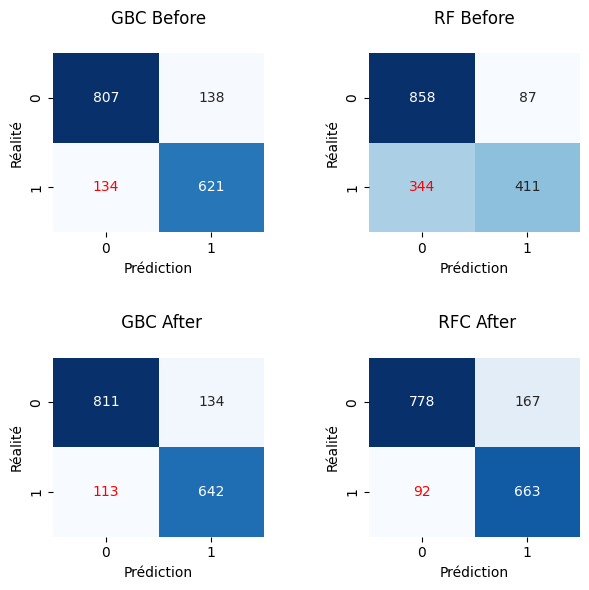

In [518]:
# @title Matrice de confusion Avant / Après
# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Tracer les matrices de confusion pour chaque modèle avant l'optimisation
for i, (model, y_pred) in enumerate([('GBC Before', y_pred_gbc_before),('RF Before', y_pred_rfc_before)]):
    ax = axes[0][i]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{model}\n')
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Réalité')

    # Définir la couleur rouge pour les vrais négatifs
    for text in ax.texts:
        if text.get_text() == str(cm[1][0]):
            text.set_color('red')

# Tracer les matrices de confusion pour chaque modèle après l'optimisation
for i, (model, y_pred) in enumerate([('GBC After', y_pred_gbc_after),('RFC After', y_pred_rfc_after)]):
    ax = axes[1][i]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f' {model}\n')
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Réalité')

    # Définir la couleur rouge pour les vrais négatifs
    for text in ax.texts:
        if text.get_text() == str(cm[1][0]):
            text.set_color('red')

# Ajuster l'espacement entre les sous-graphiques pour éviter le chevauchement des étiquettes
plt.tight_layout()
#plt.show()

# Ajuster l'espacement vertical entre les sous-graphiques pour ajouter un espace
plt.subplots_adjust(hspace=0.7)

# Ajuster l'espacement horizontal entre les sous-graphiques avant l'optimisation
plt.subplots_adjust(wspace=0.5)

# Afficher la figure
plt.show()


## **4-3 Courbe ROC**

In [519]:
# @title Calcul roc_curve

# Calcul des False_Positive et True_Positive pour chaque modèle pour pouvoir tracer les courbes par la suite avec plotly
# on utilse roc_curve pour extraire ces informations, et ne garder que celle qui nous interessent

# Avant l'optimisation
fp_gbc_before, tp_gbc_before, _ = roc_curve(y_test, gbc_before.predict_proba(X_test)[:, 1])
fp_rfc_before, tp_rfc_before, _ = roc_curve(y_test, rfc_before.predict_proba(X_test)[:, 1])

# Après l'optimisation
fp_gbc_after, tp_gbc_after, _ = roc_curve(y_test, gbc_after.predict_proba(X_test)[:, 1])
fp_rfc_after, tp_rfc_after, _ = roc_curve(y_test, rfc_after.predict_proba(X_test)[:, 1])


In [520]:
# @title Calcul roc_auc_score

from sklearn.metrics import roc_auc_score

# Calcul des scores AUC pour chaque modèle avant l'optimisation
auc_gbc_before = round(roc_auc_score(y_test, gbc_before.predict_proba(X_test)[:, 1]), 2)
auc_rfc_before = round(roc_auc_score(y_test, rfc_before.predict_proba(X_test)[:, 1]), 2)

# Calcul des scores AUC pour chaque modèle après l'optimisation
auc_gbc_after = round(roc_auc_score(y_test, gbc_after.predict_proba(X_test)[:, 1]), 2)
auc_rfc_after = round(roc_auc_score(y_test, rfc_after.predict_proba(X_test)[:, 1]), 2)

# Affichage des scores AUC arrondis
print("AUC Gradient Boosting Class (Before):", auc_gbc_before)
print("AUC Random Forest Class (Before):", auc_rfc_before)
print("AUC Gradient Boosting Class (After):", auc_gbc_after)
print("AUC Random Forest Class (After):", auc_rfc_after)


AUC Gradient Boosting Class (Before): 0.91
AUC Random Forest Class (Before): 0.88
AUC Gradient Boosting Class (After): 0.92
AUC Random Forest Class (After): 0.92


In [521]:
# @title Graphique des Courbes ROC Avant / Après
# Plotly est utilisé pour plus d'intéraction

import plotly.graph_objs as go
import plotly.io as pio

# Tracer les courbes ROC pour chaque modèle avant et après l'optimisation sur un seul graphique
roc_fig = go.Figure()

# Epaisseur des courbes
curve_width = 1

# Courbes avant l'optimisation
roc_fig.add_trace(go.Scatter(x= fp_gbc_before,
                             y= tp_gbc_before,
                             mode='lines', name=f'Gradient Boosting Class (Before) (AUC={auc_gbc_before:.2f})',
                             line=dict(color='blue', width=curve_width)))

roc_fig.add_trace(go.Scatter(x= fp_rfc_before,
                             y=tp_rfc_before,
                             mode='lines', name=f'Random Forest Class (Before) (AUC={auc_rfc_before:.2f})',
                             line=dict(color='red', width=curve_width)))

# Courbes après l'optimisation
roc_fig.add_trace(go.Scatter(x= fp_gbc_after,
                             y= tp_gbc_after,
                             mode='lines', name=f'Gradient Boosting Class (After) (AUC={auc_gbc_after:.2f})',
                             line=dict(color='green', width=curve_width)))

roc_fig.add_trace(go.Scatter(x= fp_rfc_after,
                             y= tp_rfc_after,
                             mode='lines', name=f'Random Forest Class (After) (AUC={auc_rfc_after:.2f})',
                             line=dict(color='orange', width=curve_width)))

# Courbe aléatoire
roc_fig.add_trace(go.Scatter(x= [0,1],
                             y= [0,1],
                             mode='lines', name='aléatoire',
                             line=dict(color='black', width=curve_width, dash='dash')))

# Mise en forme du graphique
roc_fig.update_layout(title='Courbes ROC des modèles avant et après optimisation',
                      xaxis_title='Taux faux positifs',
                      yaxis_title='Taux vrais positifs',
                      legend=dict(x=0.5, y=0.1),
                      plot_bgcolor='rgba(0,0,0,0)',
                      width=800, height=500,
                      xaxis=dict(showgrid=True, gridcolor='lightgrey', zeroline=True, zerolinecolor='black'),
                      yaxis=dict(showgrid=True, gridcolor='lightgrey', zeroline=True, zerolinecolor='black'))




# Afficher le graphique
pio.show(roc_fig)


## **4-4 Shap**

In [522]:
# @title Instalation de shap
!pip install shap
import shap

In [523]:
# @title Comprendre le nombre de dimension de chaque modèle

#GBC
explainer_gbc = shap.TreeExplainer(gbc)
shap_values_gbc = explainer_gbc.shap_values(X_test)
print("Dimension de la matrice Valeurs Shap du GBC : ", shap_values_gbc.shape)

#RFC
explainer_rfc = shap.TreeExplainer(rf)
shap_values_rfc = explainer_rfc.shap_values(X_test)
print("Dimension de la matrice Valeurs Shap du RFC : ", shap_values_rfc.shape)

Dimension de la matrice Valeurs Shap du GBC :  (1700, 35)
Dimension de la matrice Valeurs Shap du RFC :  (1700, 35, 2)


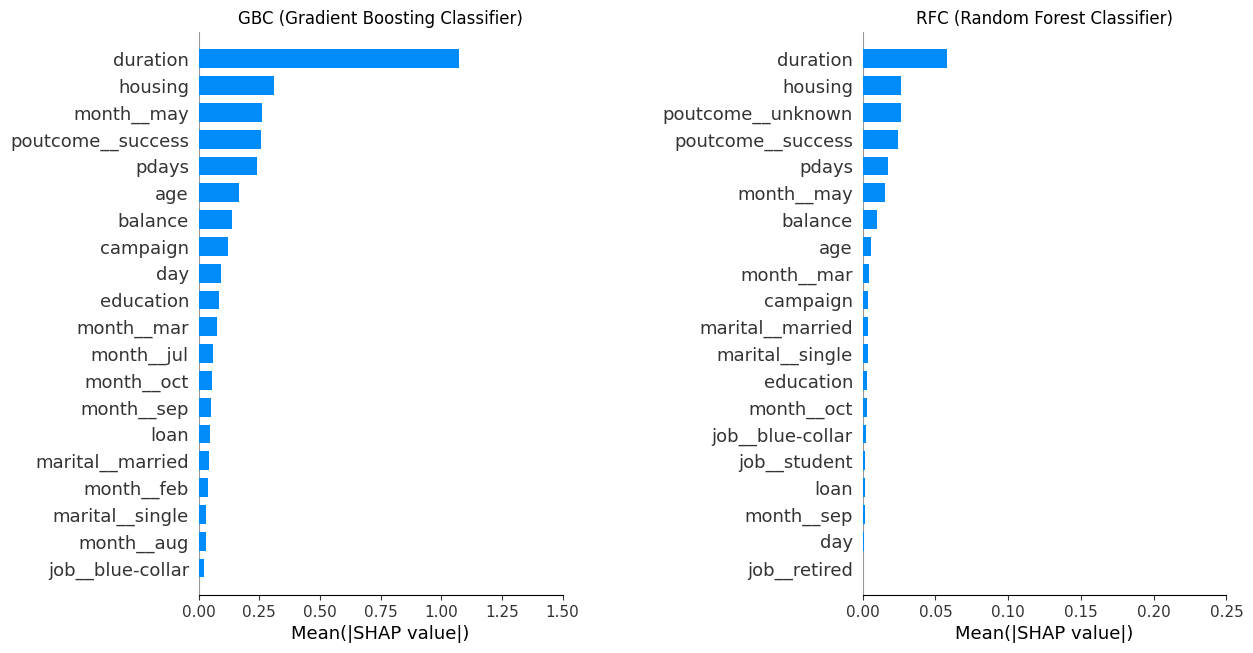

In [524]:
# @title Interpretation SHAP - bar plot
import matplotlib.pyplot as plt

fig = plt.figure()

ax0 = fig.add_subplot(121)
shap.summary_plot(shap_values_gbc, X_test, plot_type="bar", show = False)
plt.title("GBC (Gradient Boosting Classifier)")
plt.xlabel("Mean(|SHAP value|)")
plt.xlim([0,1.5])


ax1 = fig.add_subplot(122)
shap.summary_plot(shap_values_rfc[:, :, 1], X_test, plot_type="bar", show = False)
plt.title("RFC (Random Forest Classifier)")
plt.xlabel("Mean(|SHAP value|)")
plt.xlim([0,0.25])

plt.gcf().set_size_inches(14,8)
plt.tight_layout(pad=6.0)
plt.show()

In [525]:
#on garde les données avant standardisation
test = X_test.copy()

## **4-4-1 beeswarm**

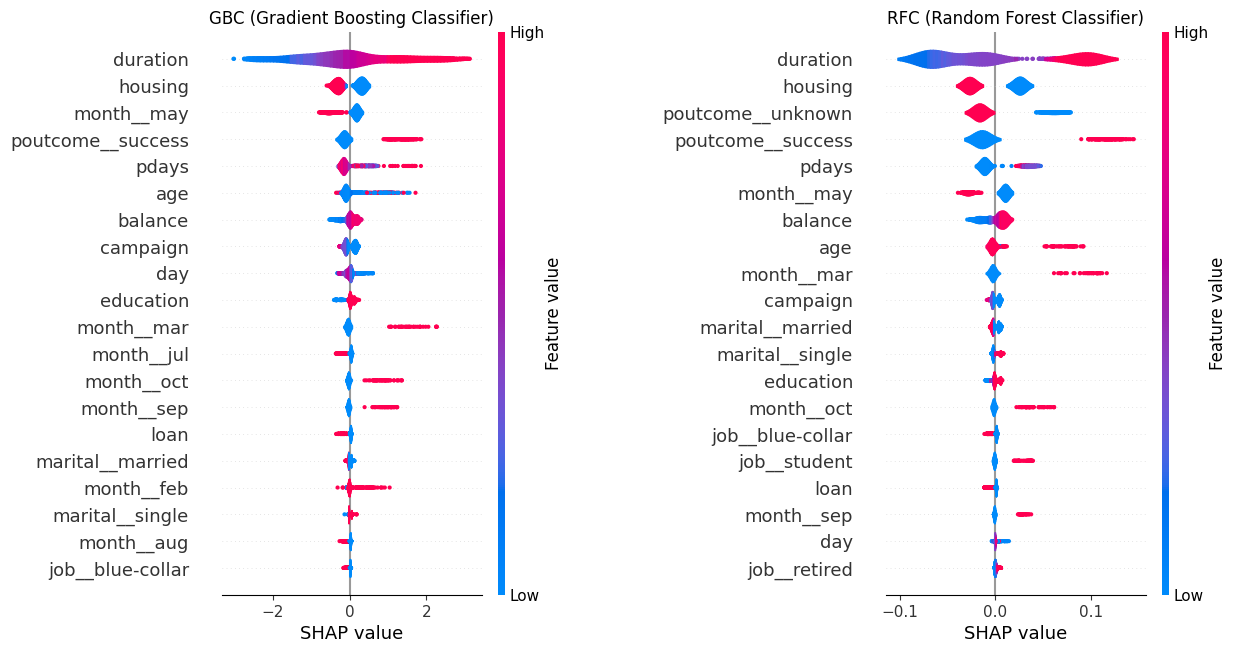

In [526]:
# @title Interpretation SHAP - beeswarm

fig = plt.figure()

# Gradient Boosting Classifier
ax0 = fig.add_subplot(121)
shap.summary_plot(shap_values_gbc, X_test, plot_type="violin", show = False)
plt.title("GBC (Gradient Boosting Classifier)")
plt.xlabel("SHAP value")

# Random Forest Classifier
ax1 = fig.add_subplot(122)
shap.summary_plot(shap_values_rfc[:, :, 1], X_test, plot_type="violin", show = False)
plt.title("RFC (Random Forest Classifier)")
plt.xlabel("SHAP value")

# figure
plt.gcf().set_size_inches(14,8)
plt.tight_layout(pad=6.0)
plt.show()

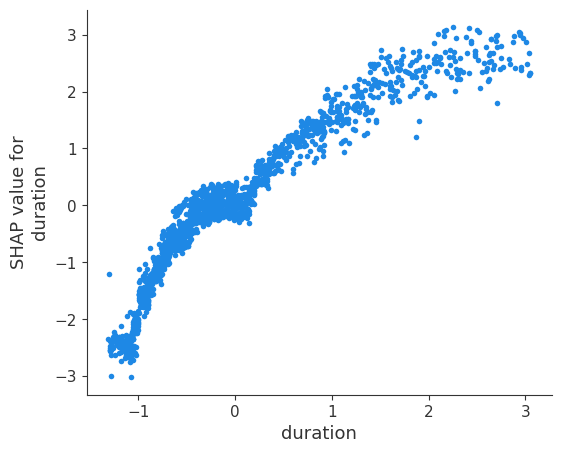

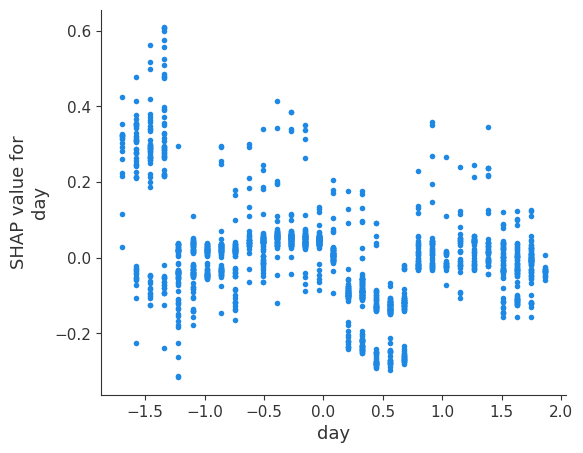

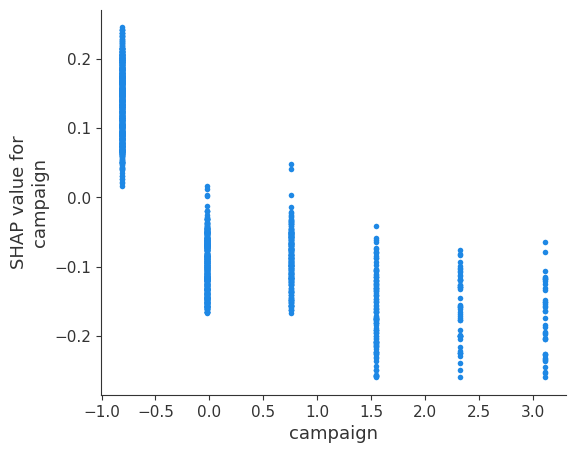

In [527]:
# @title Dépendence_plot

for var in ['duration','day','campaign'] :
  shap.dependence_plot(var, shap_values_gbc, test, interaction_index=None)

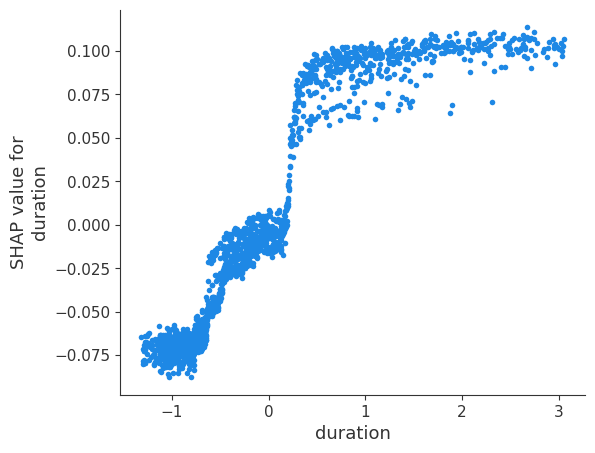

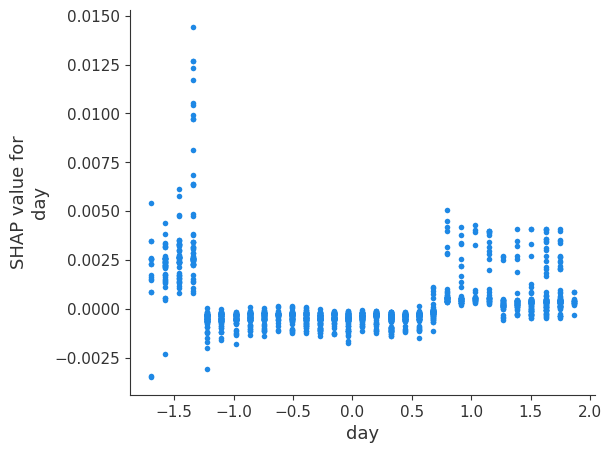

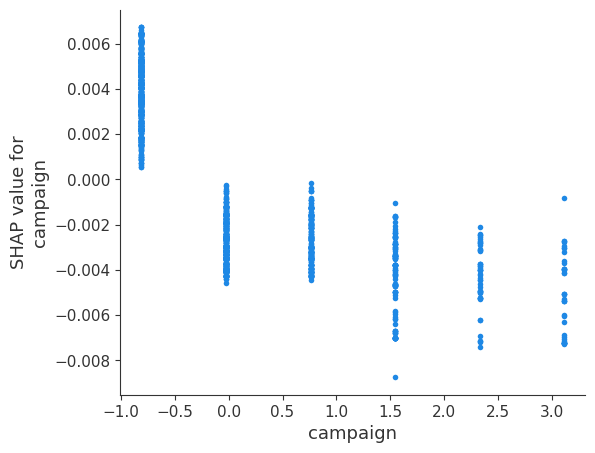

In [528]:
# @title Dépendence_plot

for var in ['duration','day','campaign'] :
  shap.dependence_plot(var, shap_values_rfc[:, :, 1], test, interaction_index=None)

## **4-4-2 force_plot**

In [529]:
# @title Selectionner le numéro de ligne que vous voulez étudier :
num_ligne = 102  # @param {type: "number"}

In [530]:
# @title Identification du client
num_client = X_test.index[num_ligne]
print("La ligne", num_ligne, "selectionée correspond au client :", num_client, "de notre base de donnée initiale")
print("Ci dessous les caractéristique de ce meme client :")
print('\n')
print(X_test_copie.loc[num_client])


La ligne 102 selectionée correspond au client : 472 de notre base de donnée initiale
Ci dessous les caractéristique de ce meme client :


age                      31
education                 2
default                   0
balance                1858
housing                   0
loan                      0
day                      12
duration                453
campaign                  3
pdays                     0
month__aug             True
month__dec            False
month__feb            False
month__jan            False
month__jul            False
month__jun            False
month__mar            False
month__may            False
month__nov            False
month__oct            False
month__sep            False
marital__married      False
marital__single        True
job__blue-collar      False
job__entrepreneur     False
job__housemaid        False
job__management        True
job__retired          False
job__self-employed    False
job__services         False
job__student          

In [531]:
# @title Etude du client sélectionné précédement
print('Information pour la ligne :', num_ligne, ',(client :', num_client ,')dont le résulat du choix du dépot est : ' , y_test.iloc[num_ligne], '\n')
ligne_selec = test.iloc[[num_ligne]]
display(ligne_selec)
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

# SHAP force du modèle GBC
print("Graphique SHAP force du modèle GBC")
print ('Le modèle prédit :' , y_pred_GBC[num_ligne])
shap.initjs()
display(shap.force_plot(shap.TreeExplainer(gbc).expected_value, shap_values_gbc[num_ligne,:], test.iloc[num_ligne,:]))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

# SHAP force du modèle RFC
print("Graphique SHAP force du modèle RFC")
print ('Le modèle prédit :' , y_pred_rfc[num_ligne])
shap.initjs()
shap.force_plot(shap.TreeExplainer(rf).expected_value[1], shap_values_rfc[num_ligne,:,1], X_test.iloc[num_ligne,:])

Information pour la ligne : 102 ,(client : 472 )dont le résulat du choix du dépot est :  1 



,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,poutcome__success,poutcome__unknown
472,-0.855851,1.208975,-0.125875,1.053124,-0.972709,-0.398668,-0.390523,0.582227,0.760283,-0.490143,...,-0.15428,1.833576,-0.247745,-0.189672,-0.306038,-0.174578,-0.448713,-0.192568,-0.330711,0.526501


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Graphique SHAP force du modèle GBC
Le modèle prédit : 1


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Graphique SHAP force du modèle RFC
Le modèle prédit : 1


In [532]:
# @title Selectionner le numéro de ligne que vous voulez étudier :
num_ligne = 150  # @param {type: "number"}

In [548]:
# @title Identification du client
num_client = X_test.index[num_ligne]
print("La ligne", num_ligne, "selectionée correspond au client :", num_client, "de notre base de donnée initiale")
print("Ci dessous les caractéristique de ce meme client :")
print('\n')
print(X_test_copie.loc[num_client])



La ligne 150 selectionée correspond au client : 711 de notre base de donnée initiale
Ci dessous les caractéristique de ce meme client :


age                      28
education                 2
default                   0
balance                   0
housing                   1
loan                      0
day                       4
duration                546
campaign                  3
pdays                   196
month__aug            False
month__dec            False
month__feb             True
month__jan            False
month__jul            False
month__jun            False
month__mar            False
month__may            False
month__nov            False
month__oct            False
month__sep            False
marital__married       True
marital__single       False
job__blue-collar      False
job__entrepreneur     False
job__housemaid        False
job__management       False
job__retired          False
job__self-employed     True
job__services         False
job__student          

In [536]:
# @title Etude du client sélectionné précédement
print('Information pour la ligne :', num_ligne, ',(client :', num_client ,')dont le résulat du choix du dépot est : ' , y_test.iloc[num_ligne], '\n')
ligne_selec = test.iloc[[num_ligne]]
display(ligne_selec)
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

# SHAP force du modèle GBC
print("Graphique SHAP force du modèle GBC")
print ('Le modèle prédit :' , y_pred_GBC[num_ligne])
shap.initjs()
display(shap.force_plot(shap.TreeExplainer(gbc).expected_value, shap_values_gbc[num_ligne,:], test.iloc[num_ligne,:]))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

# SHAP force du modèle RFC
print("Graphique SHAP force du modèle RFC")
print ('Le modèle prédit :' , y_pred_rfc[num_ligne])
shap.initjs()
shap.force_plot(shap.TreeExplainer(rf).expected_value[1], shap_values_rfc[num_ligne,:,1], X_test.iloc[num_ligne,:])

Information pour la ligne : 150 ,(client : 711 )dont le résulat du choix du dépot est :  1 



,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,poutcome__success,poutcome__unknown
711,-1.129807,1.208975,-0.125875,-0.81303,1.028057,-0.398668,-1.339396,0.973782,0.760283,1.246161,...,-0.15428,-0.545382,-0.247745,5.272249,-0.306038,-0.174578,-0.448713,-0.192568,-0.330711,-1.899331


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Graphique SHAP force du modèle GBC
Le modèle prédit : 0


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Graphique SHAP force du modèle RFC
Le modèle prédit : 1
